In [1]:
import numpy as np
import pandas as pd
import keras
from keras.utils import np_utils


C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_Train, y_Train), (x_Test, y_Test) = keras.datasets.mnist.load_data()

In [3]:
#訓練資料60000筆
print('x_train_image:',x_Train.shape)
print('y_train_label:',y_Train.shape)
#測試資料10000筆
print('x_test_image:',x_Test.shape)
print('y_test_label:',y_Test.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)
x_test_image: (10000, 28, 28)
y_test_label: (10000,)


In [4]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

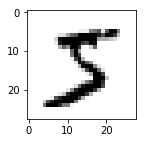

5

In [5]:
plot_image(x_Train[0])
y_Train[0]

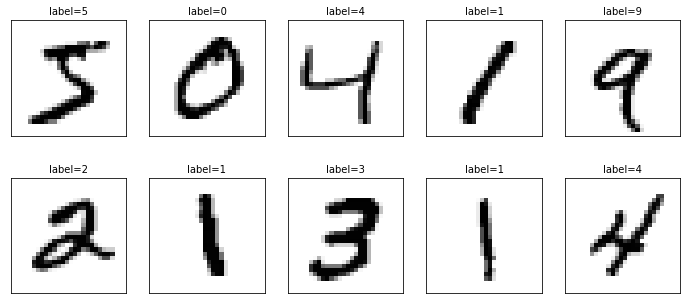

In [6]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()
plot_images_labels_prediction(x_Train,y_Train,[],0,10)

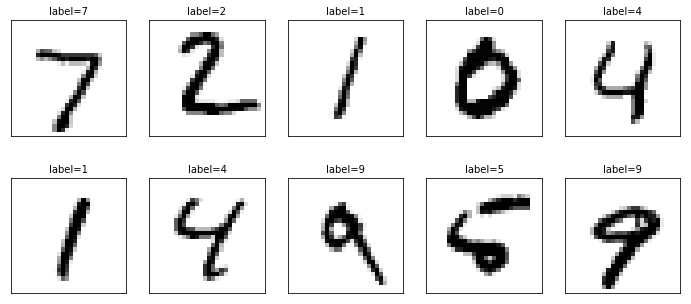

In [7]:
plot_images_labels_prediction(x_Test,y_Test,[],0,10)

In [8]:
x_Train.shape

(60000, 28, 28)

In [9]:
# 多加一個顏色的維度 
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [10]:
x_Train4D.shape

(60000, 28, 28, 1)

In [11]:
# 將數值縮小到0~1
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [12]:
# 把類別做Onehot encoding
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [13]:
#建立CNN模型
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [14]:
model = Sequential()

In [15]:
#filter為16, Kernel size為(5,5),Padding為(same)
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))

In [16]:
# MaxPooling size為(2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))

In [17]:
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))

In [18]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [19]:
# 平坦化
model.add(Flatten())

In [20]:
model.add(Dense(128, activation='relu'))

In [21]:
model.add(Dropout(0.5))

In [22]:
model.add(Dense(10,activation='softmax'))

In [23]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________

In [24]:
#訓練模型
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [25]:
train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=20, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 75s - loss: 0.5006 - acc: 0.8461 - val_loss: 0.1102 - val_acc: 0.9672
Epoch 2/20
 - 73s - loss: 0.1348 - acc: 0.9589 - val_loss: 0.0678 - val_acc: 0.9815
Epoch 3/20
 - 72s - loss: 0.0964 - acc: 0.9721 - val_loss: 0.0581 - val_acc: 0.9829
Epoch 4/20
 - 73s - loss: 0.0746 - acc: 0.9778 - val_loss: 0.0460 - val_acc: 0.9852
Epoch 5/20
 - 73s - loss: 0.0637 - acc: 0.9813 - val_loss: 0.0495 - val_acc: 0.9850
Epoch 6/20
 - 73s - loss: 0.0572 - acc: 0.9827 - val_loss: 0.0442 - val_acc: 0.9873
Epoch 7/20
 - 72s - loss: 0.0498 - acc: 0.9848 - val_loss: 0.0437 - val_acc: 0.9870
Epoch 8/20
 - 72s - loss: 0.0419 - acc: 0.9870 - val_loss: 0.0376 - val_acc: 0.9890
Epoch 9/20
 - 74s - loss: 0.0393 - acc: 0.9879 - val_loss: 0.0346 - val_acc: 0.9894
Epoch 10/20
 - 72s - loss: 0.0350 - acc: 0.9886 - val_loss: 0.0352 - val_acc: 0.9896
Epoch 11/20
 - 72s - loss: 0.0309 - acc: 0.9905 - val_loss: 0.0341 - val_acc: 0.9907
Epoch 12/20
 - 72s - los

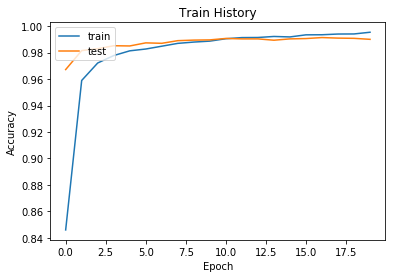

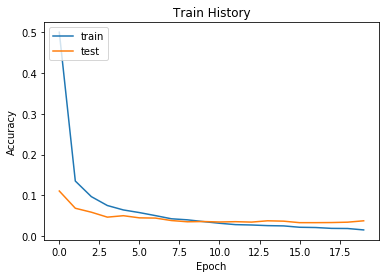

In [26]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
show_train_history('acc','val_acc')
show_train_history('loss','val_loss')

In [27]:
#評估模型準確率
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 7s 711us/step


0.9914

In [28]:
#預測結果
prediction=model.predict_classes(x_Test4D_normalize)
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

預測結果&答案


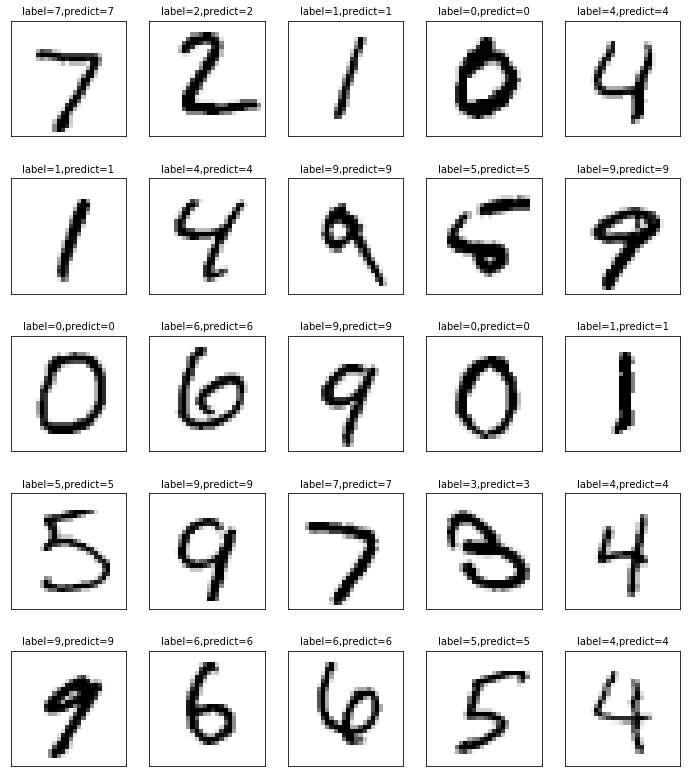

In [29]:
#查看預測結果
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=40):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1
    print('預測結果&答案')
    plt.show()
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)


In [30]:
#confusion matrix
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,0,0,0,0,0,2,1,2,0
1,0,1133,0,2,0,0,0,0,0,0
2,2,1,1021,2,2,0,0,4,0,0
3,0,0,1,1008,0,1,0,0,0,0
4,0,0,0,0,977,0,0,0,0,5
5,0,0,0,8,0,883,1,0,0,0
6,4,2,0,1,4,3,942,0,2,0
7,0,4,1,2,0,0,0,1018,1,2
8,1,0,2,3,0,1,0,0,966,1


IndexError: list index out of range

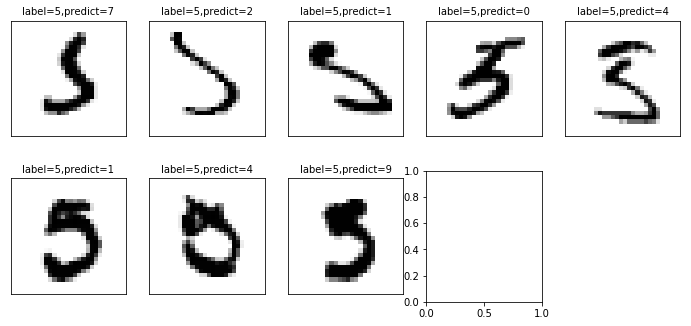

In [31]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})
df[(df.label==5)&(df.predict==3)]
plot_images_labels_prediction([x_Test[i] for i in df[(df.label==5)&(df.predict==3)].index],[y_Test[i] for i in df[(df.label==5)&(df.predict==3)].index],prediction,idx=0)